### Importing Important Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


### Reading Dataset

In [84]:
df = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset1/master/titanic_train.csv')

In [85]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


### General Information:-
1. sibsp : number of siblings and spouses traveling
2. parch : number of parents and children traveling
3. Embarked : Port of Embarkation
(C = Cherbourg, Q = Queenstown, S = Southampton)    

In [86]:
df.shape

(891, 12)

In [87]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### Observations

1. From the column 'Age' some values are missing.


In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### Observations:-

. There are missing values at the Age, Cabin and Embarked columns.

. 5 variables of integer, 2 of float and rest 6 variables are of object datatype.

#### Checking for unique values

In [89]:
df.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

In [90]:
df.duplicated().sum()

0

1. As the 'PassengerId' contains all entries with unique values then we can remove it.
2. Again the column 'Cabin' having too much missing values it is a good practice remove that column also.
3. dataset isn't contain duplicates 

In [91]:
df=df.drop(['Cabin'],axis=1)

df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


In [92]:
### Check for survived column

df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

#### We can see that the  survival rate is very low means out of 891 passengers only 342 are survived

#### Check for 'Sex' and 'Survival'

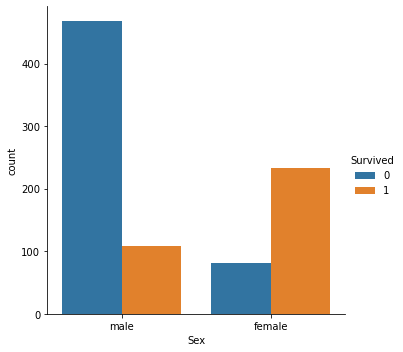

In [93]:
# Countplot
sns.catplot(x ="Sex", hue ="Survived",
kind ="count", data = df)

#### D survival rate of men is around 20% and that of women is around 75%. Therefore, whether a passenger is a male or a female plays an important role in determining if one is going to survive.

### Check for 'Pclass' vs 'Survival'

<AxesSubplot:xlabel='Survived', ylabel='Pclass'>

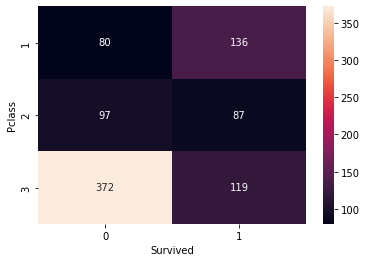

In [53]:
# Group the dataset by Pclass and Survived and then unstack them
group = df.groupby(['Pclass', 'Survived'])
pclass_survived = group.size().unstack()

# Heatmap - Color encoded 2D representation of data.
sns.heatmap(pclass_survived, annot = True, fmt ="d")


#### We can say that higher-class passengers had more survival rate than the lower class, means Pclass contributes a lot to a passenger’s survival rate.

#### Check for 'Age' vs 'Survived'

<AxesSubplot:xlabel='Sex', ylabel='Age'>

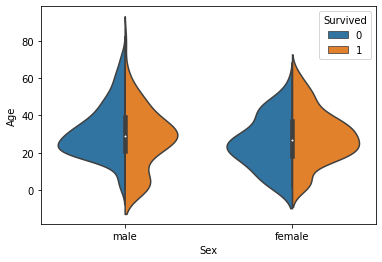

In [54]:
sns.violinplot(x ="Sex", y ="Age", hue ="Survived",
data = df, split = True)

#### Survival rate is high for children and women(age range 20-50).

#### Survival rate is Less for men as the age increases.

#### Check for SibSp & Parch together

In [94]:
df['Initial']=0
for i in df:
    df['Initial']=df.Name.str.extract("([A-Za-z]+)\.")

In [95]:
pd.crosstab(df.Initial,df.Sex).T.style.background_gradient(cmap='summer_r')

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


In [96]:
df['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don'],
                      ['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr'],inplace=True)

In [97]:
df.groupby('Initial')['Age'].mean()

Initial
Master     4.574167
Miss      21.860000
Mr        32.739609
Mrs       35.981818
Other     45.888889
Name: Age, dtype: float64

#### Filling null values of 'Age' group but we cann't directly fillit with mean coz different range of values are present in the column

In [98]:
df.loc[(df.Age.isnull() & (df.Initial)=='Mr'), 'Age'].fillna(32.73,inplace = True)

In [99]:
df.loc[(df.Age.isnull() & (df.Initial)=='Mr'), 'Age'].fillna(32.73,inplace = True)
df.loc[(df.Age.isnull() & (df.Initial)=='Mrs'), 'Age'].fillna(35.98,inplace = True)
df.loc[(df.Age.isnull() & (df.Initial)=='Master'), 'Age'].fillna(4.57,inplace = True)
df.loc[(df.Age.isnull() & (df.Initial)=='Miss'), 'Age'].fillna(21.86,inplace = True)
df.loc[(df.Age.isnull() & (df.Initial)=='Other'), 'Age'].fillna(45.889,inplace = True)


In [100]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Initial
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S,Other
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S,Miss
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,S,Miss
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C,Mr


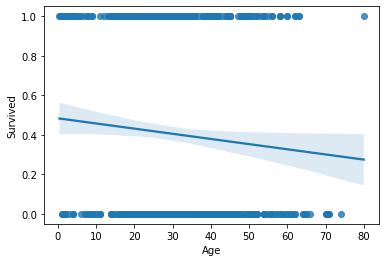

In [101]:
sns.regplot(x = 'Age', y = 'Survived', data = df)  #reg-regression-pointer always go  upward

plt.show()

#### Observation :-
. The Toddlers(age<5) were saved in large numbers. Possibliy, Women and Child first policy employs while rescue operation employed.
. The oldest Passenger was saved (80 years).
. Maximum number of deaths were in age group of 30-40.

#### Check for 'Fare' & 'Survival'

<AxesSubplot:xlabel='Fare_Range', ylabel='Survived'>

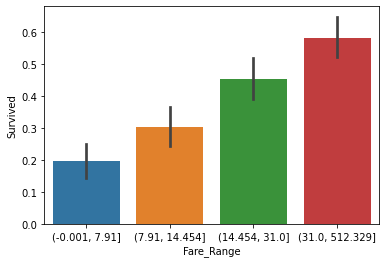

In [23]:
# Divide Fare into 4 bins
df['Fare_Range'] = pd.qcut(df['Fare'], 4)

sns.barplot(x ='Fare_Range', y ='Survived',
data = df)


#### We can observe that if a passenger paid a higher fare, the survival rate is more.

#### Check for 'Embarked' vs 'Survived'

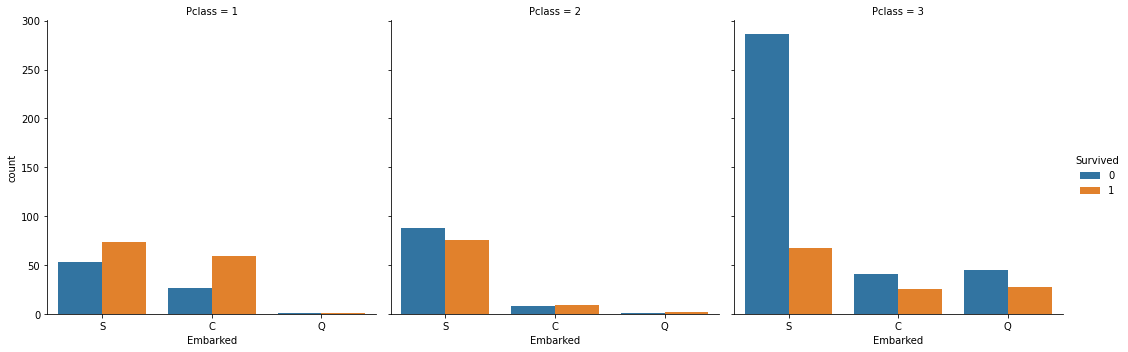

In [63]:

sns.catplot(x ='Embarked', hue ='Survived',
kind ='count', col ='Pclass', data = df)


#### Majority of the passengers boarded from S. So, the missing values can be filled with S.

In [102]:
# replacing the missing values in the Embarked feature with S

df['Embarked'].fillna('S', inplace=True)
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Initial
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S,Other
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S,Miss
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,S,Miss
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C,Mr


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


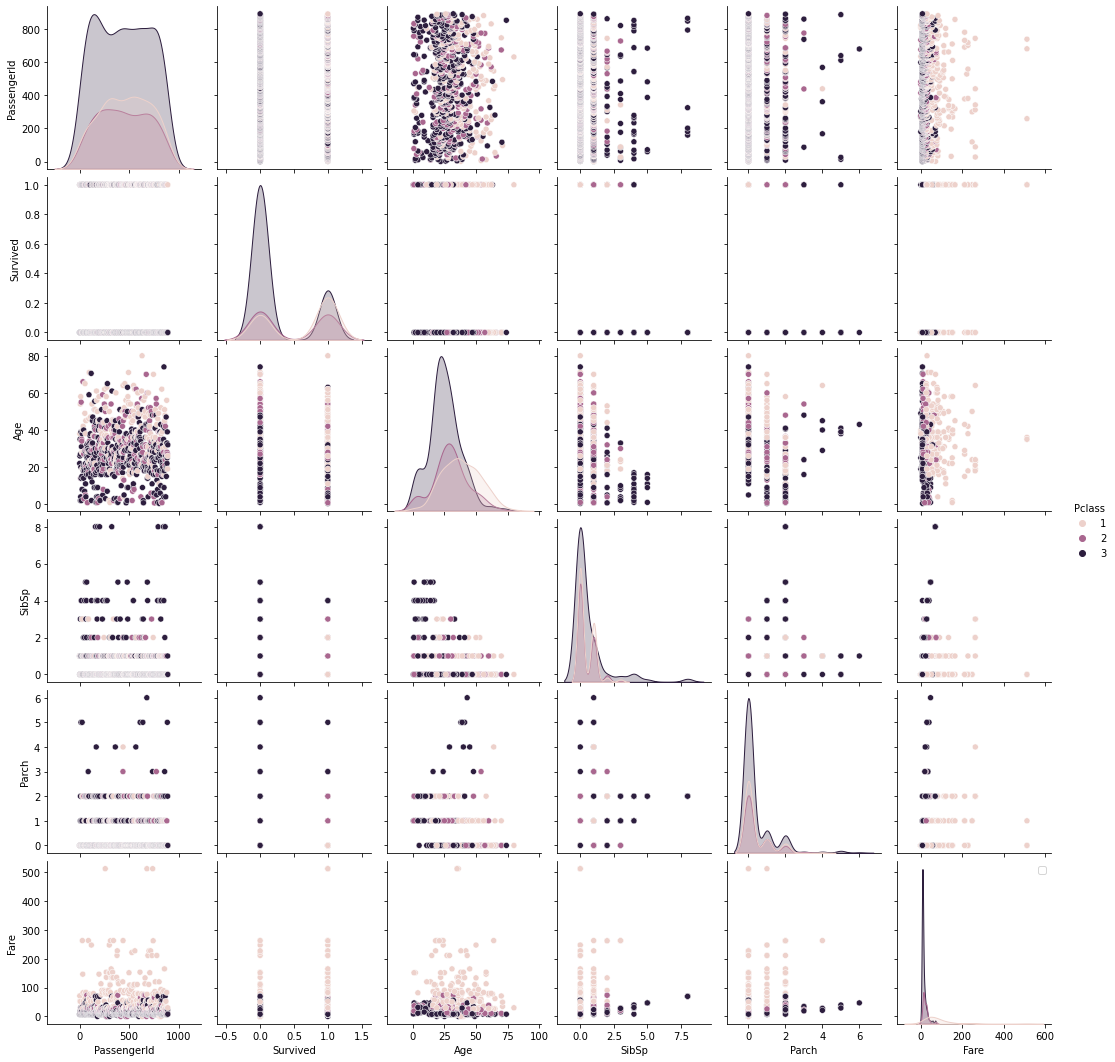

In [65]:
sns.pairplot(data=df, hue='Pclass')
plt.legend()
plt.show()

#### Checking correlation

In [66]:
df.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


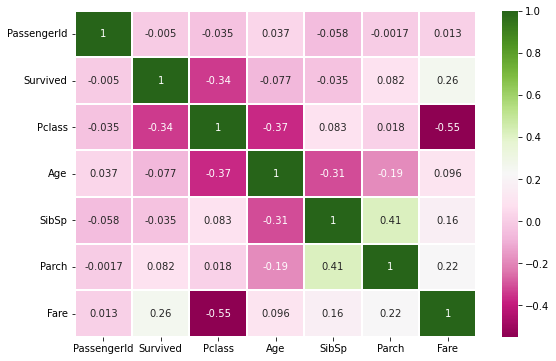

In [67]:
plt.figure(figsize=(9,6))
sns.heatmap(df.corr(), annot= True, cmap='PiYG',linewidths=0.3)
plt.show()

#### Outlier detection and removal

In [103]:
# Droping unnecessary column for further investigation
df.drop(["PassengerId", "Name" , "Ticket" ],axis=1,inplace=True)

##### Variables by thier dataypes

In [104]:
Numerical_features= ['Survived', 'Pclass', 'SibSp', 'Parch','Age', 'Fare']
Categorical_features = ['Sex', 'Embarked', 'Initial']

### As we dont remove the outliers from target variable then first drop it

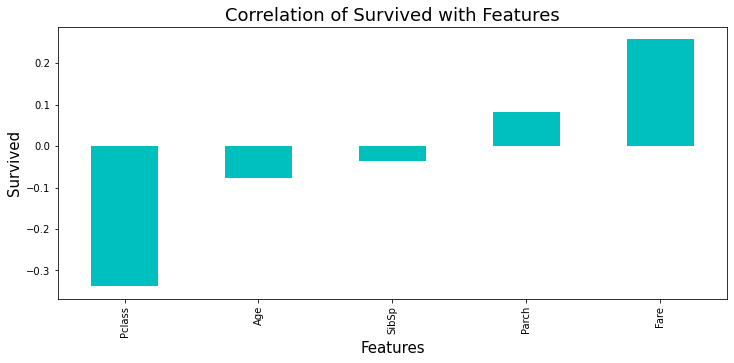

In [105]:
plt.figure(figsize = (12,5))
df.corr()['Survived'].drop(['Survived']).plot(kind='bar',color = 'c')
plt.xlabel('Features',fontsize=15)
plt.ylabel('Survived',fontsize=15)
plt.title('Correlation of Survived with Features',fontsize = 18)
plt.show()

#### Saperation of categorical and numerical datatypes columns

In [106]:
Numerical_features= ['Survived', 'Pclass', 'SibSp', 'Parch','Age', 'Fare']
df_Numerical_features = ['Pclass', 'SibSp', 'Parch','Age', 'Fare']
Categorical_features = ['Sex', 'Embarked', 'Initial']

C:\Users\ASUS\Downloads\New folder (2)\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\ASUS\Downloads\New folder (2)\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\ASUS\Downloads\New folder (2)\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warn

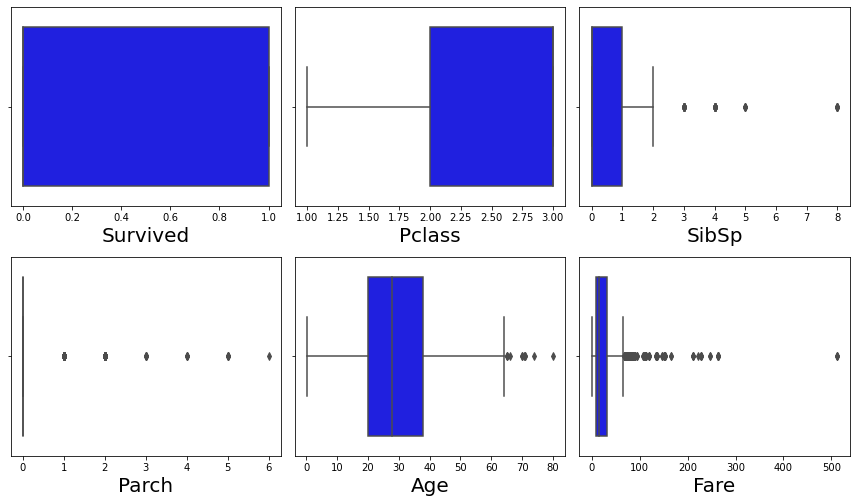

In [107]:
# Identifying the outliers using boxplot in train dataset
plt.figure(figsize=(12,10),facecolor='white')
plotnumber=1
for i in Numerical_features:
    if plotnumber<=10:
        ax=plt.subplot(3,3,plotnumber)
        sns.boxplot(df[i],color='blue')
        plt.xlabel(i,fontsize=20)
    plotnumber+=1
plt.tight_layout()

#### Outliers are present in the 'Age' & 'Fare' column

In [108]:
def detect_outliers(df,n,features):
    """
    Takes a dataframe df of features and returns a list of the indices
    corresponding to the observations containing more than n outliers according
    to the Tukey method.
    """
    outlier_indices = []
    
    # iterate over features(columns)
    for col in features:
        # 1st quartile (25%)
        Q1 = np.percentile(df[col], 25)
        # 3rd quartile (75%)
        Q3 = np.percentile(df[col],75)
        # Interquartile range (IQR)
        IQR = Q3 - Q1
        
        # outlier step
        outlier_step = 1.5 * IQR
        
        # Determine a list of indices of outliers for feature col
        outlier_list_col = df[(df[col] < Q1 - outlier_step) | (df[col] > Q3 + outlier_step )].index
        
        # append the found outlier indices for col to the list of outlier indices 
        outlier_indices.extend(outlier_list_col)
        
    # select observations containing more than 2 outliers
    outlier_indices = Counter(outlier_indices)        
    multiple_outliers = list( k for k, v in outlier_indices.items() if v > n )
    
    return multiple_outliers   

In [109]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Initial
0,0,3,male,22.0,1,0,7.2500,S,Mr
1,1,1,female,38.0,1,0,71.2833,C,Mrs
2,1,3,female,26.0,0,0,7.9250,S,Miss
3,1,1,female,35.0,1,0,53.1000,S,Mrs
4,0,3,male,35.0,0,0,8.0500,S,Mr


In [110]:
# detect outliers from Age, SibSp , Parch and Fare
from collections import Counter
Outliers_to_drop = detect_outliers(df,2,["Age","SibSp","Parch","Fare"])
# Drop outliers

In [111]:
# Drop outliers
df = df.drop(Outliers_to_drop, axis = 0).reset_index(drop=True)

In [112]:
df.shape

(881, 9)

In [113]:
# Filling missing value of Age 

## Fill Age with the median age of similar rows according to Pclass, Parch and SibSp
# Index of NaN age rows
index_NaN_age = list(df["Age"][df["Age"].isnull()].index)

for i in index_NaN_age :
    age_med = df["Age"].median()
    age_pred = df["Age"][((df['SibSp'] == df.iloc[i]["SibSp"]) & (df['Parch'] == df.iloc[i]["Parch"]) & (df['Pclass'] == df.iloc[i]["Pclass"]))].median()
    if not np.isnan(age_pred) :
        df['Age'].iloc[i] = age_pred
    else :
        df['Age'].iloc[i] = age_med

C:\Users\ASUS\AppData\Local\Temp\ipykernel_12500\2430526638.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Age'].iloc[i] = age_pred


#### Encoding Categorical Features

In [114]:
# Using Label encoder for transforming Categorical data
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in Categorical_features:
    df[i] = le.fit_transform(df[i])
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Initial
0,0,3,1,22.0,1,0,7.2500,2,2
1,1,1,0,38.0,1,0,71.2833,0,3
2,1,3,0,26.0,0,0,7.9250,2,1
3,1,1,0,35.0,1,0,53.1000,2,3
4,0,3,1,35.0,0,0,8.0500,2,2


### Standard Scaler

In [115]:

x = df.drop(['Survived'], axis =1)
y = df['Survived']

from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
x_scale = scaler.fit_transform(x)

### Model Building

In [116]:
#Importing Machine learning Model library
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

### Logistic Regression

In [143]:
x_train, x_test, y_train, y_test = train_test_split(x_scale, y, random_state=69, test_size=0.25)
log_reg=LogisticRegression()
log_reg.fit(x_train,y_train)
y_pred=log_reg.predict(x_test)

print(accuracy_score(y_test, y_pred))
print('\n')
print(confusion_matrix(y_test, y_pred))
print('\n')
print(classification_report(y_test, y_pred))

0.8687782805429864


[[120   9]
 [ 20  72]]


              precision    recall  f1-score   support

           0       0.86      0.93      0.89       129
           1       0.89      0.78      0.83        92

    accuracy                           0.87       221
   macro avg       0.87      0.86      0.86       221
weighted avg       0.87      0.87      0.87       221



In [125]:
from sklearn.model_selection import cross_val_score
CVscore = cross_val_score(log_reg, x_scale, y, cv =5)
print("CVScore :" ,CVscore)
print("Mean CV Score :",CVscore.mean())
print("Std deviation :",CVscore.std())

CVScore : [0.77966102 0.79545455 0.77272727 0.78977273 0.82386364]
Mean CV Score : 0.7922958397534668
Std deviation : 0.017637669142336193


### Decision Tree Classifier

In [127]:
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)
y_pred=dtc.predict(x_test)
print('Accuracy Score of Decision Tree Classifier :',accuracy_score(y_test, y_pred))
print('Confusion matrix of Decision Tree Classifier :',confusion_matrix(y_test, y_pred))
print('classification Report of Decision Tree Classifier :',classification_report(y_test, y_pred))

Accuracy Score of Decision Tree Classifier : 0.7963800904977375
Confusion matrix of Decision Tree Classifier : [[118  24]
 [ 21  58]]
classification Report of Decision Tree Classifier :               precision    recall  f1-score   support

           0       0.85      0.83      0.84       142
           1       0.71      0.73      0.72        79

    accuracy                           0.80       221
   macro avg       0.78      0.78      0.78       221
weighted avg       0.80      0.80      0.80       221



In [130]:
CVscore = cross_val_score(dtc, x_scale, y, cv =5)
print("CVScore :" ,CVscore)
print("Mean CV Score :",CVscore.mean())
print("Std deviation :",CVscore.std())

CVScore : [0.76271186 0.78409091 0.81818182 0.75       0.82386364]
Mean CV Score : 0.7877696456086286
Std deviation : 0.029310912779277245


### Random Forest Classifier

In [144]:
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)
y_pred=rfc.predict(x_test)
print('Accuracy Score of Random Forest Classifier :',accuracy_score(y_test, y_pred))
print('Confusion matrix of Random Forest Classifier :',confusion_matrix(y_test, y_pred))
print('classification Report of Random Forest Classifier :',classification_report(y_test, y_pred))

Accuracy Score of Random Forest Classifier : 0.8416289592760181
Confusion matrix of Random Forest Classifier : [[112  17]
 [ 18  74]]
classification Report of Random Forest Classifier :               precision    recall  f1-score   support

           0       0.86      0.87      0.86       129
           1       0.81      0.80      0.81        92

    accuracy                           0.84       221
   macro avg       0.84      0.84      0.84       221
weighted avg       0.84      0.84      0.84       221



In [131]:
CVscore = cross_val_score(rfc, x_scale, y, cv =5)
print("CVScore :" ,CVscore)
print("Mean CV Score :",CVscore.mean())
print("Std deviation :",CVscore.std())

CVScore : [0.81355932 0.79545455 0.86363636 0.76704545 0.81818182]
Mean CV Score : 0.8115755007704161
Std deviation : 0.031625061694757664


### AdaBoost Classifier

In [145]:
adbc=AdaBoostClassifier()
adbc.fit(x_train,y_train)
y_pred=adbc.predict(x_test)
print('Accuracy Score of AdaBoost Classifier :',accuracy_score(y_test, y_pred))
print('Confusion matrix of AdaBoost Classifier :',confusion_matrix(y_test, y_pred))
print('classification Report of AdaBoost Classifier :',classification_report(y_test, y_pred))

Accuracy Score of AdaBoost Classifier : 0.8642533936651584
Confusion matrix of AdaBoost Classifier : [[117  12]
 [ 18  74]]
classification Report of AdaBoost Classifier :               precision    recall  f1-score   support

           0       0.87      0.91      0.89       129
           1       0.86      0.80      0.83        92

    accuracy                           0.86       221
   macro avg       0.86      0.86      0.86       221
weighted avg       0.86      0.86      0.86       221



In [146]:
CVscore = cross_val_score(adbc, x_scale, y, cv =5)
print("CVScore :" ,CVscore)
print("Mean CV Score :",CVscore.mean())
print("Std deviation :",CVscore.std())

CVScore : [0.78531073 0.8125     0.81818182 0.80113636 0.85795455]
Mean CV Score : 0.8150166923472009
Std deviation : 0.024228571770988406


### Gradient Boosting Classifier

In [147]:
gbc=GradientBoostingClassifier()
gbc.fit(x_train,y_train)
y_pred=gbc.predict(x_test)
print('Accuracy Score of Gradient Boosting Classifier :',accuracy_score(y_test, y_pred))
print('Confusion matrix of Gradient Boosting Classifier :',confusion_matrix(y_test, y_pred))
print('classification Report of Gradient Boosting Classifier :',classification_report(y_test, y_pred))

Accuracy Score of Gradient Boosting Classifier : 0.832579185520362
Confusion matrix of Gradient Boosting Classifier : [[117  12]
 [ 25  67]]
classification Report of Gradient Boosting Classifier :               precision    recall  f1-score   support

           0       0.82      0.91      0.86       129
           1       0.85      0.73      0.78        92

    accuracy                           0.83       221
   macro avg       0.84      0.82      0.82       221
weighted avg       0.83      0.83      0.83       221



In [148]:
CVscore = cross_val_score(gbc, x_scale, y, cv =5)
print("CVScore :" ,CVscore)
print("Mean CV Score :",CVscore.mean())
print("Std deviation :",CVscore.std())

CVScore : [0.83050847 0.8125     0.85227273 0.79545455 0.85795455]
Mean CV Score : 0.8297380585516179
Std deviation : 0.023567286230155634


# Conclusion

## As the Logistic Regression fetches the highest accuracy score then we should continue with the same as a final model

### Hyper Parameter Tuning : GridSearchCV

In [138]:
from sklearn.model_selection import GridSearchCV

In [139]:
parameter = [{'fit_intercept': [True, False], #default: True
            'penalty': ['l1','l2'],
            'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'], #default: lbfgs
            'random_state': [69]
             }]

In [140]:
GCV = GridSearchCV(LogisticRegression(),parameter,verbose=5)
GCV.fit(x_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV 1/5] END fit_intercept=True, penalty=l1, random_state=69, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5] END fit_intercept=True, penalty=l1, random_state=69, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/5] END fit_intercept=True, penalty=l1, random_state=69, solver=newton-cg;, score=nan total time=   0.0s
[CV 4/5] END fit_intercept=True, penalty=l1, random_state=69, solver=newton-cg;, score=nan total time=   0.0s
[CV 5/5] END fit_intercept=True, penalty=l1, random_state=69, solver=newton-cg;, score=nan total time=   0.0s
[CV 1/5] END fit_intercept=True, penalty=l1, random_state=69, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END fit_intercept=True, penalty=l1, random_state=69, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END fit_intercept=True, penalty=l1, random_state=69, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/5] END fit_intercept=True, penalty=l1, random_state=69, solver=l

[CV 1/5] END fit_intercept=False, penalty=l2, random_state=69, solver=newton-cg;, score=0.780 total time=   0.0s
[CV 2/5] END fit_intercept=False, penalty=l2, random_state=69, solver=newton-cg;, score=0.803 total time=   0.0s
[CV 3/5] END fit_intercept=False, penalty=l2, random_state=69, solver=newton-cg;, score=0.773 total time=   0.0s
[CV 4/5] END fit_intercept=False, penalty=l2, random_state=69, solver=newton-cg;, score=0.765 total time=   0.0s
[CV 5/5] END fit_intercept=False, penalty=l2, random_state=69, solver=newton-cg;, score=0.750 total time=   0.0s
[CV 1/5] END fit_intercept=False, penalty=l2, random_state=69, solver=lbfgs;, score=0.780 total time=   0.0s
[CV 2/5] END fit_intercept=False, penalty=l2, random_state=69, solver=lbfgs;, score=0.803 total time=   0.0s
[CV 3/5] END fit_intercept=False, penalty=l2, random_state=69, solver=lbfgs;, score=0.773 total time=   0.0s
[CV 4/5] END fit_intercept=False, penalty=l2, random_state=69, solver=lbfgs;, score=0.765 total time=   0.0s

C:\Users\ASUS\Downloads\New folder (2)\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
30 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\ASUS\Downloads\New folder (2)\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\ASUS\Downloads\New folder (2)\lib\site-packages\sklearn\linear_model\_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\ASUS\Downloads\New folder (2)\lib\site-packages\sklearn\linear_model\_logistic.p

GridSearchCV(estimator=LogisticRegression(),
             param_grid=[{'fit_intercept': [True, False],
                          'penalty': ['l1', 'l2'], 'random_state': [69],
                          'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                     'saga']}],
             verbose=5)

In [141]:
GCV.best_params_

{'fit_intercept': True, 'penalty': 'l1', 'random_state': 69, 'solver': 'saga'}

### Final Model

In [149]:
Final_model = LogisticRegression(fit_intercept =True,penalty= "l1",solver='saga',random_state= 69)
Final_model.fit(x_train,y_train)
y_pred=Final_model.predict(x_test)
print('Final Random Forest Classifier Model')
print('Accuracy Score :', accuracy_score(y_test, y_pred))
print('Confusion matrix of Random Forest Classifier :',confusion_matrix(y_test, y_pred))
print('Classification Report of Random Forest Classifier',classification_report(y_test, y_pred))

Final Random Forest Classifier Model
Accuracy Score : 0.8687782805429864
Confusion matrix of Random Forest Classifier : [[120   9]
 [ 20  72]]
Classification Report of Random Forest Classifier               precision    recall  f1-score   support

           0       0.86      0.93      0.89       129
           1       0.89      0.78      0.83        92

    accuracy                           0.87       221
   macro avg       0.87      0.86      0.86       221
weighted avg       0.87      0.87      0.87       221



### Let's plot confusion matrix for final model

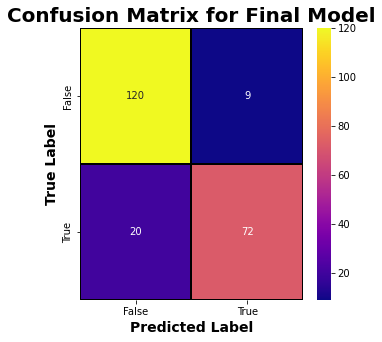

In [150]:

Matrix = confusion_matrix(y_test, y_pred)

x_labels = ["False","True"]
y_labels = ["False","True"]

fig , ax = plt.subplots(figsize=(5,5))
sns.heatmap(Matrix, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, 
            cmap="plasma", xticklabels = x_labels, yticklabels = y_labels)

plt.xlabel("Predicted Label",fontsize=14,fontweight='bold')
plt.ylabel("True Label",fontsize=14,fontweight='bold')
plt.title('Confusion Matrix for Final Model',fontsize=20,fontweight='bold')
plt.show()

### AUC ROC Curve of Final Model

C:\Users\ASUS\Downloads\New folder (2)\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


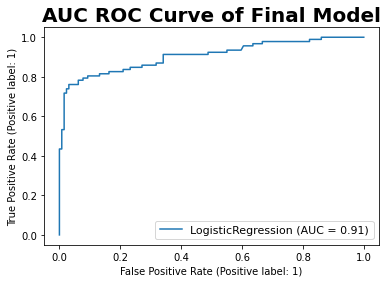

Auc Score : 0.8564206268958544


In [153]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import plot_roc_curve
disp = plot_roc_curve(Final_model,x_test,y_test)   
plt.legend(prop={'size':11}, loc='lower right')
plt.title('AUC ROC Curve of Final Model',fontsize=20,fontweight='bold')
plt.show()
auc_score = roc_auc_score(y_test, Final_model.predict(x_test))
print('Auc Score :',auc_score)